# Solución Reto Machine Learning
Juan David Ortiz Trujillo, estudiante de Desarrollo de Software Corporación Universitaria Remington

- Solución al reto de Machine Learning de  [Colomb-ia: Retos de Machine Learning.](https://github.com/danielgil1/supervised-basico-admission-exams)

Este dataset es un ejercicio del curso de Machine Learning de Andrew Ng. Consiste en un conjuto de datos de 2 variables:

* Nota de examen 1 de un estudiante
* Nota de examen 2 de un estudiante
* Resultado si fue admitido a una universidad

## Objetivo:
- Crear un algortimo que tome como input un los resultados del examen 1 y 2 y retorne si el estudiante fue admitido o no. Solo se pueden utilizar los datos del train-set.csv para entrenar.

### 1. Importar librerias:

In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

### 2. Cargar Datos:

In [29]:
df = pd.read_csv('data/train-set.csv',header=None)
df_test = pd.read_csv('data/test-set.csv',header=None)
columnas = ['examen 1','examen 2','aprobo']
df.columns = columnas
df_test.columns = columnas

In [30]:
df_test.head()

,examen 1,examen 2,aprobo
0,35.623660,85.024693,0
1,30.286711,80.894998,0
2,40.847409,60.902198,0
3,60.182599,40.308552,0
4,50.032736,50.344376,0


### 3. Visualizar dispersión de los datos:
- En el diagrama de dispersión se puede evidenciar la división de los aspirantes admitidos y no admitidos.

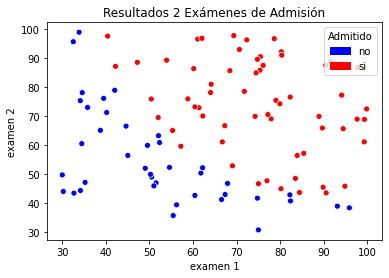

In [31]:
color_pal = ['blue','red']

colors = {'0': ('blue','no'),'1': ('red','si'),}

g = sns.scatterplot(df['examen 1'],df['examen 2'],hue=df['aprobo'],legend='brief',palette = color_pal)
patches = []
for key,value in colors.items():
    patch = mpatches.Patch(color=colors[key][0], label=colors[key][1])
    patches.append(patch)
g.legend(handles =patches,title= 'Admitido',loc='upper right')
g.set_title("Resultados 2 Exámenes de Admisión")
g.figure.savefig('images/disp_map.jpg')

### 3. Separar datos de entrenamiento y testing:
- Como los datos de testing y entrenamiento ya están en df separados, no es necesario la librería train_test_split

In [32]:
X_train = df.drop('aprobo',axis =1)
y_train = df.aprobo
X_test = df_test.drop('aprobo',axis =1)
y_test = df_test.aprobo
print(X_train.shape)
print(y_train.shape)

(100, 2)
(100,)


### 4. Preprocesamiento de datos:
- Al utilizar SVC, es recomendable transformar los datos para ser procesados por el SVC, para ello se crea un nuevo df, y se transforman con el StandardScaler.

In [33]:
sc = StandardScaler()
X_train_array = sc.fit_transform(X_train.values)
X_train = pd.DataFrame(X_train_array,index = X_train.index, columns = X_train.columns)
X_test_array = sc.transform(X_test.values)
X_test = pd.DataFrame(X_test_array,index = X_test.index, columns = X_test.columns)
X_test.head(2)

,examen 1,examen 2
0,-1.550597,1.016932
1,-1.826256,0.793580


### 5. Creación y entrenamiento del modelo:
- Se utiliza el SVC (Support Vector Classification), con el tipo de kernel rbf.

In [34]:
print('Entrenando el modelo...')
clf = SVC(kernel= 'rbf',max_iter =-1,C=10000000,gamma=0.85,).fit(X_train,y_train,)
print('Terminado')

Entrenando el modelo...
Terminado


### 6. Testing del modelo SVC:
- Se realiza el testing del modelo con la función integrada score, y con la operación solicitada por el reto. Logrando una puntuación de 100%

In [35]:
print(f'El modelo tiene una precisión de {clf.score(X_test,y_test)*100}%')
n_aciertos = 0
n_total = 0
for i in range(0,len(X_test.index)):
    test= list(X_test.iloc[i])
    res = clf.predict([test])[0]
    n_total +=1
    if res == y_test.iloc[i]:
        n_aciertos +=1
score = n_aciertos / n_total *100
print(f'El score es de : {score}%')

El modelo tiene una precisión de 100.0%
El score es de : 100.0%


### 8. Visualización del modelo:
- Se puede visualizar la divisíón de los aspirantes aprobados y no aprobados por el clasificador.

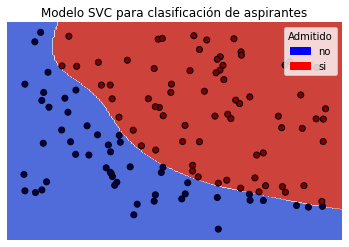

In [36]:
X = df.append(df_test)
y = X.aprobo
X = X.drop('aprobo',axis =1)
X = sc.transform(X.values)

def mostrar_plot_modelo_SVC(X,y,title,h=0.02):
    h = .02
    x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
    y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=1)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.seismic,edgecolors='black')
    plt.legend(handles =patches,title= 'Admitido',loc='best')
    plt.title(title)
    plt.axis('off')
    plt.savefig('images/SVC_model.jpg')
    plt.show()

titulo = 'Modelo SVC para clasificación de aspirantes'
mostrar_plot_modelo_SVC(X,y,titulo)

### 9. Guardar modelo:
- Se guarda el modelo para que pueda ser utilizado por el archivo main.py .

In [37]:
import pickle 
filename = 'model/Modelo_svc.sav'
pickle.dump(clf, open(filename, 'wb'))